In [ ]:
import cv2
from google.colab.patches import cv2_imshow

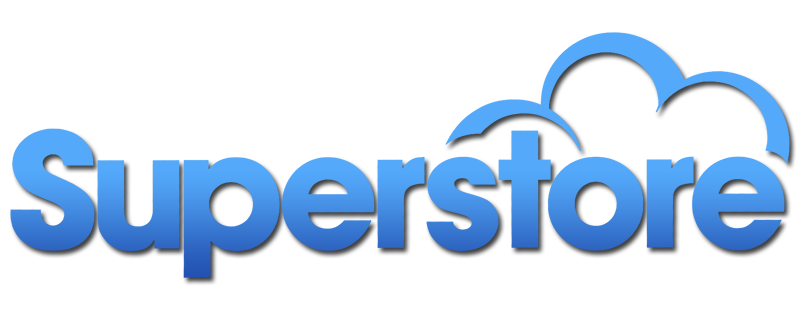

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Blotta_Matias_Data_Science/Superstore-NBC.png',cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# **DATASET :** **SUPERTIENDA EN ESTADOS UNIDOS**

**ABSTRACT:**

Este set de datos nos proporciona información acerca de las **ventas de una supertienda en Estados Unidos entre los años 2018 a 2021**. La base de datos fué descargada desde Kaggle.com.

 El conjunto de datos incluye información acerca de quienes son los clientes de la tienda,cuándo realizaron la compra y a qué segmento pertenecen. Además, el dataset aporta información detallada de los productos que vende la tienda haciendo una distinción de ellos en categorías y subcategorías. También nos brinda datos acerca de la cantidad de productos que se han vendido en cada órden de compra y si la operación arrojó ganancias o pérdidas para la supertienda. Es interesante mencionar también que contamos con datos acerca de los envíos los cuales pueden ser útiles para analizarlos también (como por ejemplo determinar a qué ciudades, estados o regiones se dirigieron los mismos).

Los atributos con los que cuenta el Dataset son los siguientes:

* Row ID: ID único para cada fila.
* Order ID: ID de pedido único para cada Cliente.
* Order Date: Fecha de pedido del producto.
* Ship Date: Fecha de Envío del Producto.
* Ship Mode: Modo de Envío especificado por el Cliente.
* Customer ID: ID único para identificar a cada Cliente.
* Customer Name: Nombre del Cliente.
* Segment: El segmento al que pertenece el Cliente.
* Country: País de residencia del Cliente.
* City: Ciudad de residencia del Cliente.
* State: Estado de residencia del Cliente.
* Postal: Código Postal de cada Cliente.
* Region: Región a la que pertenece el Cliente.
* Product ID: ID único del Producto.
* Category: Categoría del producto solicitado.
* Sub-Category: Subcategoría del producto solicitado.
* Product Name: Nombre del Producto
* Sales: Ventas del Producto.
* Quantity: Cantidad del Producto.
* Discount: Descuento proporcionado.
* Profit: Ganancia/Pérdida.

# **1.Definición del Objetivo**

En primer lugar poder determinar **cuán influyente es cada segmento de clientes en las ventas de la Supertienda** (En lo que respecta a total de venta en USD, cantidad de productos vendidos, categorías predilectas, beneficios (profits) que dejan a la compañía.) **e intentar desarrollar un modelo predictivo que permita estimar la probabilidad de repetición de compra por parte de los clientes que ya han realizado una compra en la supertienda.**

Tiene cómo propósito principal mejorar la retención de clientes por segmentos (fidelización de los mismos con la tienda) y optimizar la toma de decisiones estratégicas a futuro, por lo que el trabajo está destinado a diversas audiencias:

* Equipos de Marketing: Pueden utilizar los resultados del análisis para diseñar campañas personalizadas y estrategias de retención dirigidas a segmentos específicos de clientes

* Gerente de Ventas: Les proporciona datos para ajustar estrategias de ventas y mejorar la relación con los clientes clave.

* Equipo de Atención al Cliente: Conocerá mejor las necesidades y expectativas de diferentes segmentos de clientes, lo que facilitará la personalización del servicio y la resolución proactiva de problemas.

* Gerencia General y Dirección Estratégica: Podrá alinear mejor la estrategia a largo plazo de la empresa con las preferencias y comportamientos de los clientes.

# **2. Contexto Comercial**

Una Supertienda radicada en Estados Unidos ha estado realizando ventas desde el año 2018 al año 2021 inclusive. Directivos y ejecutivos de esta empresa quieren evaluar el rendimiento de sus ventas durante los cuatro años operativos haciendo una distinción entre los distintos segmentos de clientes.
Se pretende obtener una visión integral de la evolución de las ventas a lo largo de estos años por lo cual la empresa nos ha contratado para identificar patrones, tendencias y posibles áreas de mejora en la estrategia comercial.
La información recopilada incluye datos detallados sobre cada transacción realizada en la supertienda, abarcando desde el primer año de operación en 2018 hasta el año más reciente en 2021.
**Se busca obtener una perspectiva completa de la performance comercial adaptada a los segmentos de clientes**, permitiendo a la dirección tomar decisiones informadas para optimizar la eficiencia y rentabilidad del negocio.


# **3.Problema Comercial**

Nuestra tarea es manipular los datos disponibles y proporcionar visualizaciones que respondan a las preguntas específicas que tienen los directivos.

En cuanto a **inquietudes generales** sobre la supertienda están intesados en conocer:

a) ¿Cual fué el total de ventas en USD por Año?

b) ¿Cómo fueron las ventas mensuales en USD en los distintos años operativos de la supertienda?

c) ¿Qué cantidad de productos fueron vendidos por Categoría?¿Cómo fué la evolución en cuanto a cantidad de productos vendidos por categorías a lo largo de los años?

d) ¿Cómo es la distribución de los importes de las Ventas en USD en el conjunto de datos?

e) ¿ Existe relación entre el Total en USD de una venta y el Profit?

f) ¿Qué porcentaje de descuento fué el más aplicado a las compras realizadas por los clientes?

g) ¿Existe relación entre el descuento aplicado con el importe total de la venta?

**Con respecto a la variable objetivo: Segmentos de clientes** precisan saber:

h)¿Qué porcentaje de las Ventas Totales en USD corresponde a cada Segmento de clientes historicamente en la supertienda?

i) ¿Cómo se distribuyen las ventas totales en USD de la supertienda entre los diferentes segmentos de clientes a lo largo de los cuatro años operativos (2018 a 2021)?

j) ¿Cómo fueron las ventas mensuales en USD por segmento de cliente en el período 2018-2021?

k) ¿Qué cantidad de productos vendidos por categorías a lo largo de los 4 años operativos de la tienda corresponden a cada segmento de clientes?

l) ¿Cuál fué la frecuencia de cantidad de productos vendidos por órden de compra que predominó en cada Segmento?

m) ¿Cuantas de las Órdenes de compras generadas en las distintas regiones de Estados Unidos corresponden a cada segmento de clientes?

n) ¿Cómo es la distribución de los importes de las ventas por cada segmento de cliente en los cuatro años de la supertienda?

ñ) ¿Difiere la relación entre el total de una venta en USD con el profit obtenido por segmento de clientes?




# **4. Contexto Analítico**

La empresa nos proporciona un archivo .XLSX con los datos de todas las transacciones de ventas entre los años 2018 a 2021. Contamos con datos etiquetados, es decir **la variable de interés para nosotros es la variable Segmentos**, la cual hace referencia a los **tres grupos de clientes** con los que cuenta la supertienda: **Consumer, Corporate y Home Office**. Por lo tanto, **para el análisis de estos segmentos utilizaremos modelos de aprendizaje SUPERVISADOS.**

# **Importo Librerías**

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
mpl.style.use('bmh')  #Estilo para los gráficos

# **Cargo Base de Datos**

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Blotta_Matias_Data_Science'
df= pd.read_excel('SupertiendaUSA.xlsx', index_col = 0) #Aquí definimos Row ID como Índice del df
df.head()

/content/drive/MyDrive/Blotta_Matias_Data_Science


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
4102,US-2021-102288,2021-06-19,2021-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100
9293,CA-2021-124114,2021-03-02,2021-03-02,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,Texas,76706.0,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556,1,0.8,-0.9452
8659,CA-2020-168361,2020-06-21,2020-06-25,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836,1,0.8,-1.3376
4712,CA-2018-112403,2018-03-31,2018-03-31,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852,1,0.7,-0.5964
2107,US-2018-152723,2018-09-26,2018-09-26,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,Texas,75150.0,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876,1,0.8,-1.4016


# **Exploración General del Dataset y Data Wrangling**

* **Cantidad de Registros y Columnas**

In [ ]:
df.shape

(9994, 20)

### **Detección de Duplicados**

In [ ]:
df.duplicated()

Row ID
4102    False
9293    False
8659    False
4712    False
2107    False
        ...  
4191    False
2624    False
8154    False
6827    False
2698    False
Length: 9994, dtype: bool

In [ ]:
filas_duplicadas = df.duplicated().sum()

if filas_duplicadas > 0:
    print(f"Hay {filas_duplicadas} filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

Hay 1 filas duplicadas en el DataFrame.


In [ ]:
fila_duplicada = df[df.duplicated()].iloc[0]
print(f"Fila duplicada:\n{fila_duplicada}")

Fila duplicada:
Order ID                                             US-2018-150119
Order Date                                      2018-04-23 00:00:00
Ship Date                                       2018-04-27 00:00:00
Ship Mode                                            Standard Class
Customer ID                                                LB-16795
Customer Name                                        Laurel Beltran
Segment                                                 Home Office
Country/Region                                        United States
City                                                       Columbus
State                                                          Ohio
Postal Code                                                 43229.0
Region                                                         East
Product ID                                          FUR-CH-10002965
Category                                                  Furniture
Sub-Category                    

Detectamos que el **RowID 3407** se encuentra **duplicado**, por lo que procederemos a eliminarla.

### **Eliminación de duplicados**

In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(9994, 20)
(9993, 20)


Observamos que quedó registrada en el df la eliminación de la fila duplicada.




### **Descripción general de las columnas del DF y tipos de Datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 4102 to 2698
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9993 non-null   object        
 1   Order Date      9993 non-null   datetime64[ns]
 2   Ship Date       9993 non-null   datetime64[ns]
 3   Ship Mode       9993 non-null   object        
 4   Customer ID     9993 non-null   object        
 5   Customer Name   9993 non-null   object        
 6   Segment         9993 non-null   object        
 7   Country/Region  9993 non-null   object        
 8   City            9993 non-null   object        
 9   State           9993 non-null   object        
 10  Postal Code     9982 non-null   float64       
 11  Region          9993 non-null   object        
 12  Product ID      9993 non-null   object        
 13  Category        9993 non-null   object        
 14  Sub-Category    9993 non-null   object        
 15  P

Al visualizar la información vemos que **hay** algunos **valores nulos y un error en el Dtype de 'Postal Code'** que es float64 y debería ser Int

In [ ]:
# Verificamos el tipo de datos actual de la columna 'Postal Code'
print(df['Postal Code'].dtype)

# Convertimos la columna 'Postal Code' a tipo de datos entero
df['Postal Code'] = df['Postal Code'].astype('Int64')

# Verificamos el tipo de datos después de la conversión
print(df['Postal Code'].dtype)

float64
Int64


### **Valores faltantes y análisis de NULOS**

In [ ]:
pip install missingno

<Axes: >

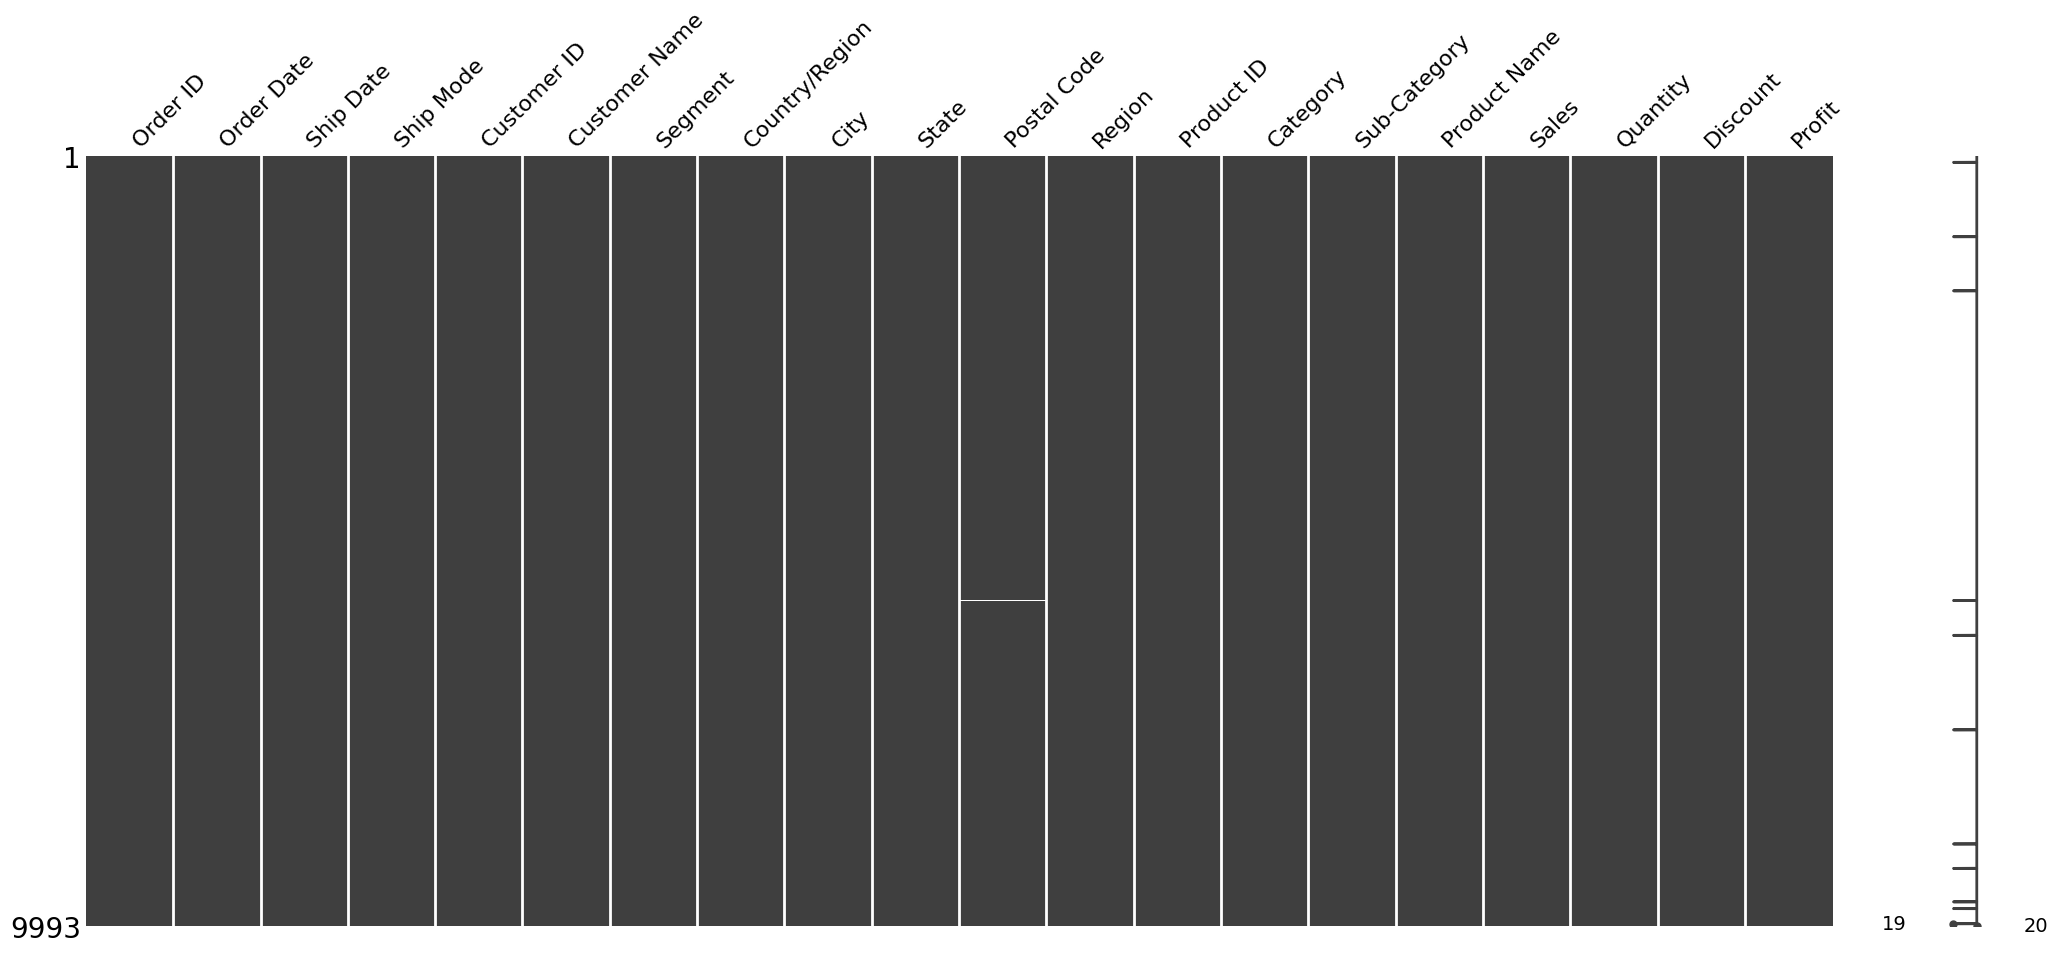

In [ ]:
import missingno as msno
msno.matrix(df)

Por medio de la librería missingno exploramos datos faltantes en el dataframe

Blanco: Valores del faltante (Vemos en 'Postal Code' que hay faltantes)

Negro: Valores con dato


In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Postal Code    0.110077
dtype: float64

<Axes: >

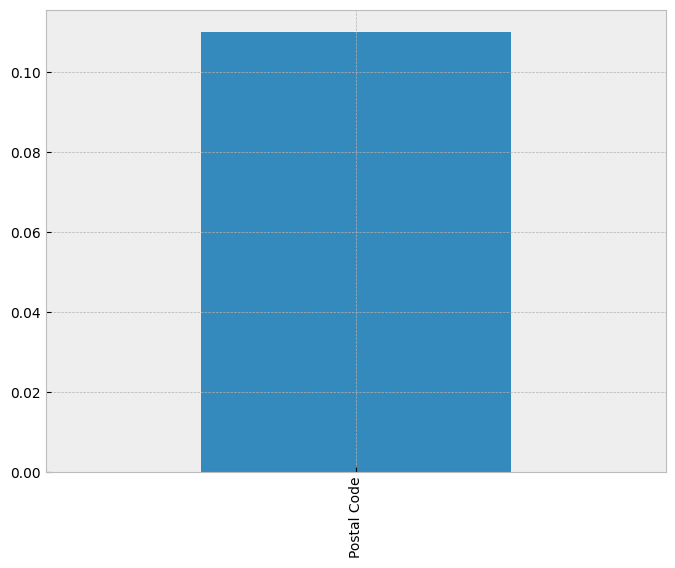

In [ ]:
# Graficamente
plt.figure(figsize=(8,6))
serie.plot(kind='bar')

En este caso, el valor es 0.110077, **lo que significa que aproximadamente el 0.11% de los valores en la columna "Postal Code" son nulos.**

* **Veamos la frecuencia de los distintos Códigos Postales para poder tomar una decisión con los valores nulos**

In [ ]:
conteo_codigo_postal = df['Postal Code'].value_counts()
conteo_codigo_postal

10035    263
10024    230
10009    229
94122    203
10011    193
94110    166
98105    165
19134    160
98103    151
90049    151
19140    150
94109    141
90045    140
90036    122
43229    119
77041    117
90004    117
19143    114
19120    113
98115    112
90008    109
60610    108
90032    108
60623    105
77095    104
60653    101
77070     91
32216     75
92105     74
31907     68
77036     65
85023     63
92037     62
19711     60
78207     59
75217     55
75220     54
28205     52
48227     51
22153     50
28540     50
42420     48
75081     48
53209     45
80219     44
21215     43
44105     42
95123     42
92024     39
30318     39
78745     39
65807     39
49201     38
97477     38
14609     36
45503     36
48234     36
33614     36
43055     35
11561     34
60505     34
40475     34
80013     34
47201     34
39212     34
1841      33
40214     33
43615     32
85705     32
22204     32
43130     31
2908      31
29203     30
38109     30
20735     29
37211     29
47374     29

Vemos que el Código Postal **10035** es el más repetido en nuestro dataset en 263 oportunidades. **Con el fin de no perder los datos de ventas** de esas filas con valores NULOS en el código postal **optamos por llenar esos valores con la MODA**, es decir el valor del código postal más repetido.

In [ ]:
# Chequeamos la moda (valor más repetido) de la columna 'Postal Code'
moda_postal_code = df['Postal Code'].mode()[0]
moda_postal_code

10035

In [ ]:
# Imputamos la moda a las filas con valores nulos en la columna 'Postal Code'
df['Postal Code'].fillna(moda_postal_code, inplace=True)

In [ ]:
df.info() #Ahora si corroboramos que NO contamos con VALORES NULOS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 4102 to 2698
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        9993 non-null   object        
 1   Order Date      9993 non-null   datetime64[ns]
 2   Ship Date       9993 non-null   datetime64[ns]
 3   Ship Mode       9993 non-null   object        
 4   Customer ID     9993 non-null   object        
 5   Customer Name   9993 non-null   object        
 6   Segment         9993 non-null   object        
 7   Country/Region  9993 non-null   object        
 8   City            9993 non-null   object        
 9   State           9993 non-null   object        
 10  Postal Code     9993 non-null   Int64         
 11  Region          9993 non-null   object        
 12  Product ID      9993 non-null   object        
 13  Category        9993 non-null   object        
 14  Sub-Category    9993 non-null   object        
 15  P

### **Borrado de columna**

* **Exploramos la columna COUNTRY/REGION**

In [ ]:
valores_unicos_pais_region = df['Country/Region'].unique()
print(valores_unicos_pais_region)

['United States']


Podemos ver que hay **UN SOLO PAÍS** en el dataset, por lo que podemos **ELIMINAR** esta columna

In [ ]:
# Eliminamos la columna 'Country/Region' del DataFrame
df = df.drop('Country/Region', axis=1)

In [ ]:
df.shape #Corroboramos que se eliminó la columna

(9993, 19)

* **Ordenamos el df por la columna Order Date**

In [ ]:
# Ordenar el DataFrame por la columna 'Order Date'
df.sort_values(by='Order Date', inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
7981,CA-2018-103800,2018-01-03,2018-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
741,CA-2018-112326,2018-01-04,2018-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
740,CA-2018-112326,2018-01-04,2018-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
742,CA-2018-112326,2018-01-04,2018-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
1760,CA-2018-141817,2018-01-05,2018-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


* **Variables Numéricas que nos interesan en el Dataset**


In [ ]:
columnas_de_interes = ['Sales', 'Quantity', 'Discount', 'Profit']
df[columnas_de_interes].describe() #Obtenemos descripción general de las columnas con datos int/ float.

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


* **Con el fin de poder evaluar las variables que nos interesan en el tiempo vamos a generar nuevas columnas en el dataframe fraccionando la columna Order Date en nuevas columnas denominadas Year, Month y Day**


In [ ]:
# Creamos nuevas columnas para el año, mes y día
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
Row ID,,,,,,,,,,,,,,,,,,,,,
7981,CA-2018-103800,2018-01-03,2018-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2018,1,3
741,CA-2018-112326,2018-01-04,2018-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2018,1,4
740,CA-2018-112326,2018-01-04,2018-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2018,1,4
742,CA-2018-112326,2018-01-04,2018-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2018,1,4
1760,CA-2018-141817,2018-01-05,2018-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2018,1,5


# **Preguntas Generales que nos ayudan a continuar con el análisis exploratorio del dataset (EDA) y a entender mejor la evolución de las ventas a lo largo de los años operativos de la tienda**

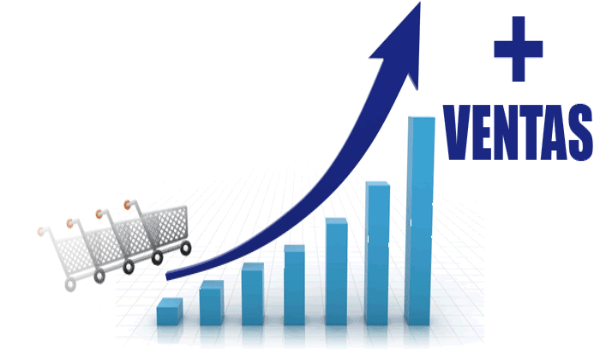

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Blotta_Matias_Data_Science/aumentar-ventas-tiendaonline.png')
nuevo_ancho = 600
nuevo_alto = 350
nuevo_tamano = (nuevo_ancho, nuevo_alto)

# Utilizamos la función resize para cambiar el tamaño de la imagen
img_redimensionada = cv2.resize(img2, nuevo_tamano)

cv2_imshow(img_redimensionada)

###**a) Performance de ventas en USD por Año**

In [ ]:
from IPython.display import display, HTML
# Agrupamos por año y sumar las ventas
ventas_por_año = df.groupby('Year')['Sales'].sum().reset_index()
# Creamos una función para aplicar el gradiente de color a la columna 'Sales'
def apply_gradient(value):
    # Normalizar el valor para que esté entre 0 y 1
    normalized_value = (value - ventas_por_año['Sales'].min()) / (ventas_por_año['Sales'].max() - ventas_por_año['Sales'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Sales'
ventas_por_año_styled = ventas_por_año.style.applymap(lambda x: apply_gradient(x), subset=['Sales'])

# Mostrar el DataFrame con colores en la columna 'Sales'
display(ventas_por_año_styled)

,Year,Sales
0,2018,483966.126100
1,2019,470532.509000
2,2020,609205.598000
3,2021,733215.255200


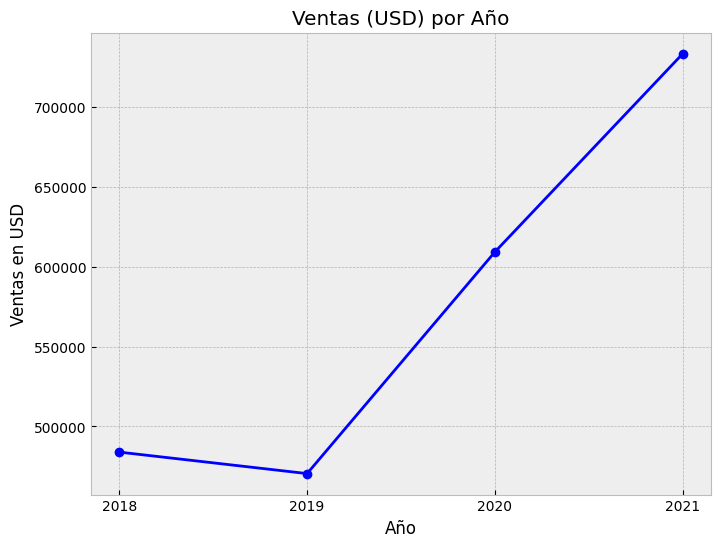

In [ ]:
# Graficamos el resultado con ajuste en el eje x
plt.figure(figsize=(8, 6))
plt.plot(ventas_por_año['Year'], ventas_por_año['Sales'], marker='o', linestyle='-', color='b')

# Configurar el eje x para mostrar solo números enteros
plt.xticks(ventas_por_año['Year'].astype(int))

plt.title('Ventas (USD) por Año')
plt.xlabel('Año')
plt.ylabel('Ventas en USD')
plt.grid(True)
plt.show()

En el gráfico podemos visualizar claramente que hubo una leve caída en total de ventas en USD en 2019 pero luego hubo un crecimiento en los años siguientes (2020 y 2021).

###**b) Performance de ventas mensuales en USD en los distintos años operativos de la supertienda**

In [ ]:
# Agrupar por mes y año y sumamos las ventas
ventas_por_mes_y_año = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Creamos una función para aplicar el gradiente de color a la columna 'Sales'
def apply_gradient(value):
    # Normalizar el valor para que esté entre 0 y 1
    normalized_value = (value - ventas_por_mes_y_año['Sales'].min()) / (ventas_por_mes_y_año['Sales'].max() - ventas_por_mes_y_año['Sales'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Sales'
ventas_por_mes_y_año_styled = ventas_por_mes_y_año.style.applymap(lambda x: apply_gradient(x), subset=['Sales'])
display(ventas_por_mes_y_año_styled)

,Year,Month,Sales
0,2018,1,14236.895000
1,2018,2,4519.892000
2,2018,3,55691.009000
3,2018,4,28013.973000
4,2018,5,23648.287000
5,2018,6,34595.127600
6,2018,7,33946.393000
7,2018,8,27909.468500
8,2018,9,81777.350800
9,2018,10,31453.393000


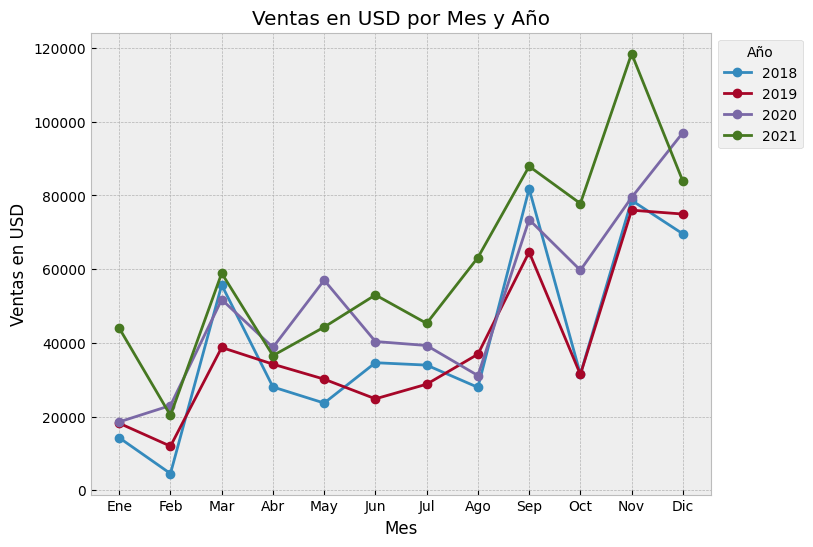

In [ ]:
# Graficamos el resultado
plt.figure(figsize=(8, 6))
for year in ventas_por_mes_y_año['Year'].unique():
    datos_ano = ventas_por_mes_y_año[ventas_por_mes_y_año['Year'] == year]
    plt.plot(datos_ano['Month'], datos_ano['Sales'], marker='o',label=year)

plt.title('Ventas en USD por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Ventas en USD')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True) #añade cuadrícula al gráfico
plt.show()

Mediante la observación del gráfico de **total de ventas mensual en USD** podemos decir en términos generales que:
* De Junio a Noviembre el año 2021 se posicionó primero en volumen en USD del total de ventas.
*El año 2020 fué el que más vendió en USD en el mes Diciembre.
*En cuanto a los primeros meses, el mes de Enero y Marzo claramente el año superior fué 2021. En tanto que, Febrero,Abril y Mayo correspondieron al año 2020.



###**c) Análisis de la Cantidad de Productos Vendidos por Categoría y su Evolución a lo Largo de los Años**

In [ ]:
productos_vendidos= df['Quantity'].sum() # Con el fin de conocer la Cantidad Total de productos vendidos a lo largo de los 4 años operativos.
productos_vendidos

37871

In [ ]:
#Ahora queremos calcular que cantidad de productos se vendieron por Categoría del Registro histórico de la supertienda (2018 al 2021)
agrupacion_categorias= df.groupby('Category') #Agrupo por Categorías
cant_productos_categorias= agrupacion_categorias['Quantity'].sum().reset_index()  #Aquí verifico que cantidad de productos se vendió por Categoría y aplico .reset_index para que Categoría no me quede como index por el GroupBy

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - cant_productos_categorias['Quantity'].min()) / (cant_productos_categorias['Quantity'].max() - cant_productos_categorias['Quantity'].min())

    # Convertir el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolver el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicar la función a la columna 'Quantity'
cant_productos_categorias_styled = cant_productos_categorias.style.applymap(lambda x: apply_gradient(x), subset=['Quantity'])

# Mostrar el DataFrame con colores en la columna 'Quantity'
display(cant_productos_categorias_styled)

,Category,Quantity
0,Furniture,8026
1,Office Supplies,22906
2,Technology,6939


In [ ]:
#En el caso que quiera saber cuantos productos se vendieron por Año y por Categoría
agrupacion_cat_años= df.groupby(['Year','Category'])['Quantity'].sum().reset_index()

def apply_gradient(value):
    # Normalizar el valor para que esté entre 0 y 1
    normalized_value = (value - agrupacion_cat_años['Quantity'].min()) / (agrupacion_cat_años['Quantity'].max() - agrupacion_cat_años['Quantity'].min())

    # Convertir el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolver el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicar la función a la columna 'Quantity'
agrupacion_cat_años_styled = agrupacion_cat_años.style.applymap(lambda x: apply_gradient(x), subset=['Quantity'])

# Mostrar el DataFrame con colores en la columna 'Quantity'
display(agrupacion_cat_años_styled)

,Year,Category,Quantity
0,2018,Furniture,1621
1,2018,Office Supplies,4569
2,2018,Technology,1389
3,2019,Furniture,1775
4,2019,Office Supplies,4715
5,2019,Technology,1489
6,2020,Furniture,2193
7,2020,Office Supplies,5946
8,2020,Technology,1698
9,2021,Furniture,2437


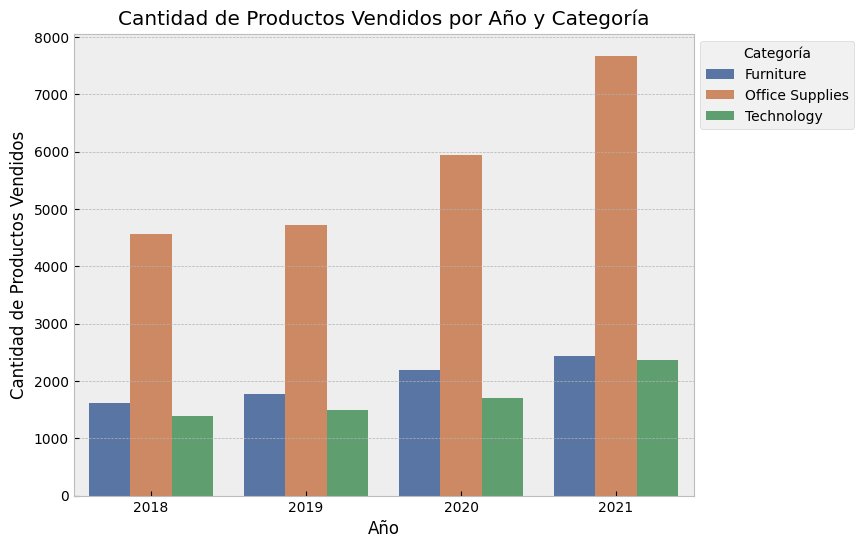

In [ ]:
# Creamos un gráfico de barras apiladas
plt.figure(figsize=(8, 6))
sns.barplot(data=agrupacion_cat_años, x="Year", y="Quantity", hue="Category", palette="deep")
plt.title("Cantidad de Productos Vendidos por Año y Categoría")
plt.xlabel("Año")
plt.ylabel("Cantidad de Productos Vendidos")
plt.legend(title="Categoría", bbox_to_anchor=(1, 1))
plt.show()

Con el gráfico de barras apiladas vemos claramente el predominio de la categoría Office Supplies en cuanto a cantidad de productos vendidos por la supertienda.
Además vemos el crecimiento año a año en cantidad de productos vendidos en las tres categorías.



###**d)Distribución de los importes de las Ventas en USD en el conjunto de datos**

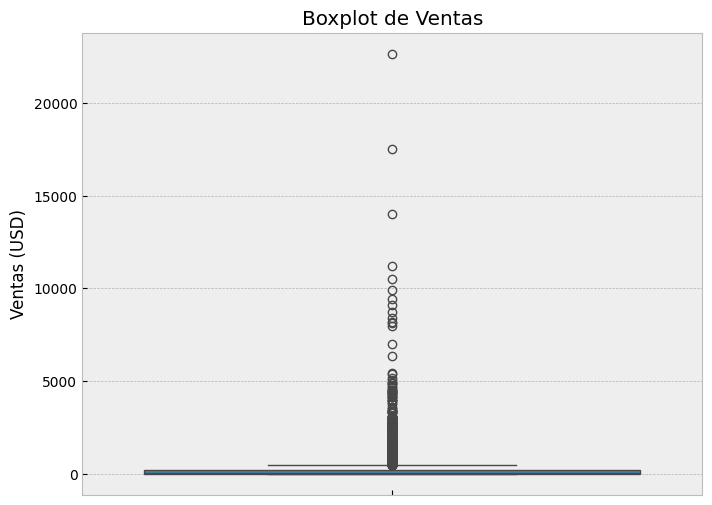

In [ ]:
#Creamos un Boxplot para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Sales')
plt.title('Boxplot de Ventas')
plt.ylabel('Ventas (USD)')
plt.show()

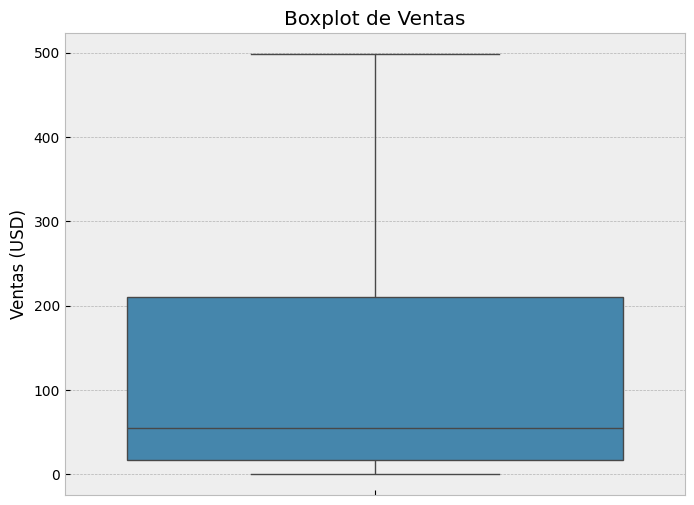

In [ ]:
#Nos encontramos en el caso anterior con muchos Outliers, por lo que para visualizar lo que pasa con los datos centrales vamos a quitarlos
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Sales',showfliers=False)
plt.title('Boxplot de Ventas')
plt.ylabel('Ventas (USD)')
plt.show()

In [ ]:
#Para analizar la distribución de los valores con más detalle vamos a calcular el valor exacto de la mediana y los quartiles

#Calculamos la mediana
mediana_ventas = df['Sales'].median()
print(f"Mediana: {mediana_ventas}")
#Calculamos el primer cuartil (25º percentil)
q1_ventas = df['Sales'].quantile(0.25)
print(f"Primer Cuartil (Q1): {q1_ventas}")
#Calculamos el tercer cuartil (75º percentil)
q3_ventas = df['Sales'].quantile(0.75)
print(f"Tercer Cuartil (Q3): {q3_ventas}")

Mediana: 54.48
Primer Cuartil (Q1): 17.28
Tercer Cuartil (Q3): 209.94


Mediante el calculo anterior y la visualización correspondiente podemos concluir que : la mitad de las observaciones en la columna "Sales"(Ventas en USD) son inferiores a al valor 54.48 y la otra mitad son superiores.
El primer cuartil (Q1) es 17.28, lo que indica que el 25% de las observaciones son iguales o inferiores a este valor.
El tercer cuartil (Q3) es 209.94, lo que indica que el 75% de las observaciones son iguales o inferiores a este valor.

###**e)Análisis de la Relación entre el Total en USD de una Venta y el Profit**

In [ ]:
df[['Sales', 'Profit']] #Llamamos a las columnas Sales y Profit de nuestro df original para tener una primera aproximación

,Sales,Profit
Row ID,,
7981,16.4480,5.5512
741,272.7360,-64.7748
740,11.7840,4.2717
742,3.5400,-5.4870
1760,19.5360,4.8840
7478,391.9800,113.6742
7480,31.1200,0.3112
7475,2573.8200,746.4078
7477,5.4800,1.4796


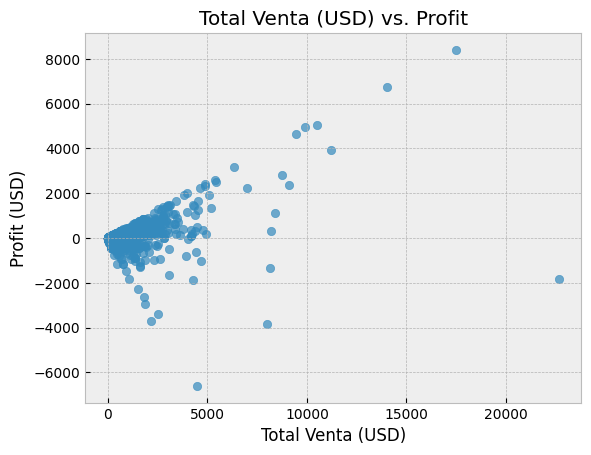

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.Sales, df.Profit, alpha= 0.7)
ax.set_title('Total Venta (USD) vs. Profit')
ax.set_xlabel('Total Venta (USD)')
ax.set_ylabel('Profit (USD)');

In [ ]:
correlation1 = df['Sales'].corr(df['Profit'])
print(f"Correlación entre Total Venta (USD) y Profit (USD): {correlation1}") # Con el resultado vemos que la correlación es débil

Correlación entre Total Venta (USD) y Profit (USD): 0.4790666754131721


La magnitud de la correlación (0.479) indica una relación moderada. No es extremadamente fuerte ni extremadamente débil, ya que en muchos casos a medida que aumenta el valor de total de venta aumenta el profit, pero también encontramos muchos casos donde a pesar de aumentar el total de venta en USD el profit termina siendo negativo (pérdida).

###**f) Análisis del Porcentaje de Descuento Más Aplicado en las Compras Realizadas por los Clientes**

In [ ]:
# Contamos la frecuencia de cada descuento
frecuencia_descuentos = df['Discount'].value_counts()
print(frecuencia_descuentos)

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64


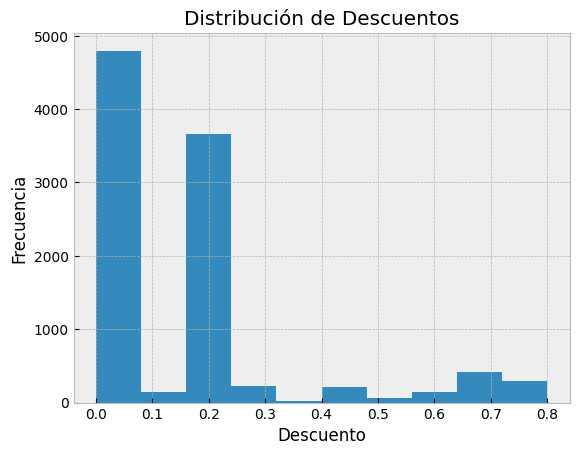

In [ ]:
fig, ax = plt.subplots()
ax.hist(df.Discount)
ax.set_title('Distribución de Descuentos')
ax.set_xlabel('Descuento')
ax.set_ylabel('Frecuencia');

En el histograma podemos visualizar que en la mayoría de las órdenes de compra no se aplicó ningún descuento y en el caso que éste fuese aplicado predominó el descuento del 20 %.

###**g) Análisis de la Relación entre el Descuento Aplicado y el Importe Total de la Venta**

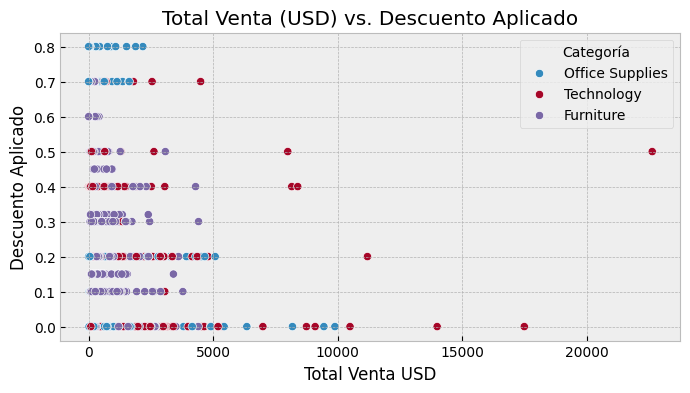

In [ ]:
#Visualizamos primero el gráfico que nos arroja
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Sales", y="Discount", hue="Category")
plt.title('Total Venta (USD) vs. Descuento Aplicado')
plt.xlabel('Total Venta USD')
plt.ylabel('Descuento Aplicado')
plt.legend(title='Categoría');

In [ ]:
#Calculamos la correlación entre ambas variables
correlacion = df['Sales'].corr(df['Discount'])
print(f"Correlación entre Total de Venta(USD) y Discounto aplicado: {correlacion}")

Correlación entre Total de Venta(USD) y Discounto aplicado: -0.028196579944143846


Mediante el resultado del cálculo de la correlación vemos que **NO** existe correlación entre el descuento aplicado y el total de la venta en USD.

# **Preguntas referidas hacia la variable : SEGMENTOS DE CLIENTES**

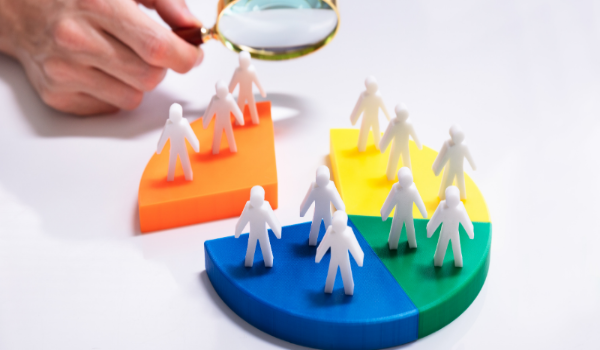

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/Blotta_Matias_Data_Science/Segmento-mercado.png',cv2.IMREAD_UNCHANGED)

# Definimos el nuevo tamaño deseado (ancho, alto)
nuevo_ancho = 600
nuevo_alto = 350
nuevo_tamano = (nuevo_ancho, nuevo_alto)

# Utilizamos la función resize para cambiar el tamaño de la imagen
img_redimensionada = cv2.resize(img3, nuevo_tamano)

cv2_imshow(img_redimensionada)

### **h) Análisis del Porcentaje de Ventas Totales en USD Correspondiente a Cada Segmento de Clientes Históricamente en la Supertienda**

In [ ]:
#Primero distingamos como fueron las ventas totales en USD por segmento en estos 4 años.
#Calculamos el total de ventas por segmentos
total_ventas_por_segmento = df.groupby('Segment')['Sales'].sum()  #en el resultado +06 expresa millón (notación científica)
total_ventas_por_segmento

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.293718e+05
Name: Sales, dtype: float64

In [ ]:
#Calculamos el porcentaje del total de ventas para cada segmento
porcentaje_ventas_por_segmento = (total_ventas_por_segmento / df['Sales'].sum()) * 100
porcentaje_ventas_por_segmento

Segment
Consumer       50.563433
Corporate      30.743192
Home Office    18.693375
Name: Sales, dtype: float64

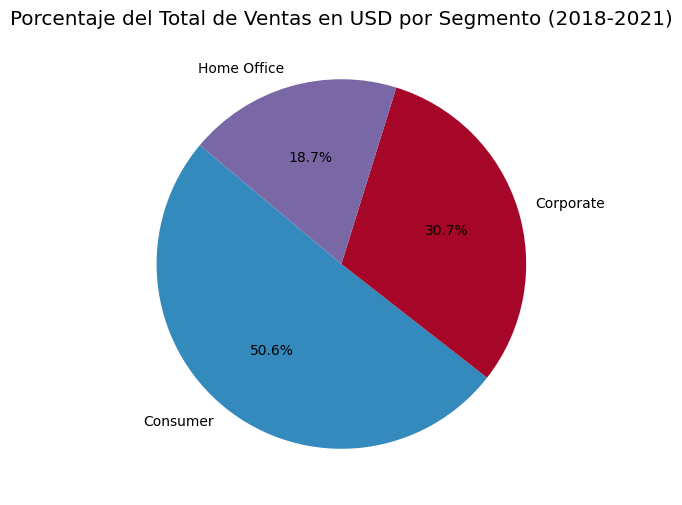

In [ ]:
# Grafico los porcentajes con un Piechart
plt.figure(figsize=(6, 6))
plt.pie(porcentaje_ventas_por_segmento, labels=porcentaje_ventas_por_segmento.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje del Total de Ventas en USD por Segmento (2018-2021)');  #autopct muestra los porcentajes en el gráfico y startangle controla el ángulo de inicio del gráfico.

Con el gráfico de tarta vemos que durante los 4 años comerciales de la supertienda el Segmento "Consumer" representó el 50,6% del total de las ventas en USD.

### **i) Análisis de la Distribución de las Ventas Totales en USD de la Supertienda entre los Diferentes Segmentos de Clientes a lo Largo de los Cuatro Años Operativos (2018-2021)**

In [ ]:
# Agrupar por año y segmento de clientes y sumar las ventas
ventas_por_segmento = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - ventas_por_segmento['Sales'].min()) / (ventas_por_segmento['Sales'].max() - ventas_por_segmento['Sales'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Sales'
ventas_por_segmento_styled = ventas_por_segmento.style.applymap(lambda x: apply_gradient(x), subset=['Sales'])

# Mostramos el DataFrame con colores en la columna 'Sales'
display(ventas_por_segmento_styled)

,Year,Segment,Sales
0,2018,Consumer,266096.812600
1,2018,Corporate,128434.873700
2,2018,Home Office,89434.439800
3,2019,Consumer,266535.933300
4,2019,Corporate,128757.306900
5,2019,Home Office,75239.268800
6,2020,Consumer,296863.899200
7,2020,Corporate,207106.361800
8,2020,Home Office,105235.337000
9,2021,Consumer,331904.699900


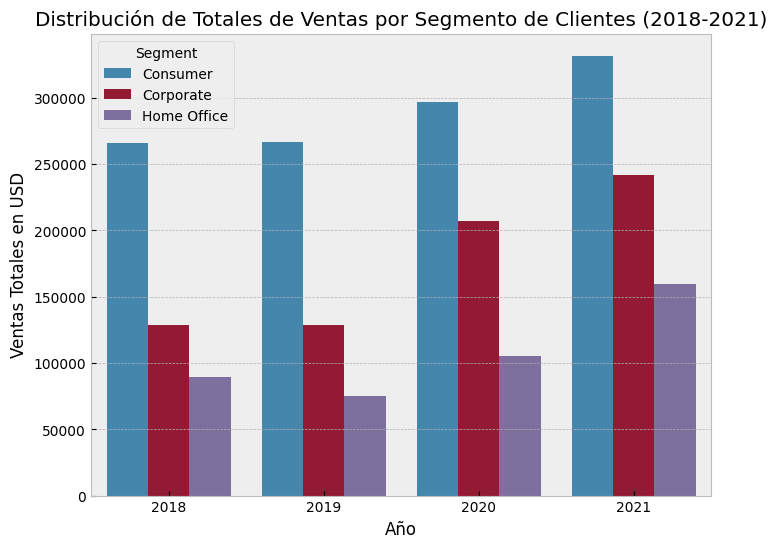

In [ ]:
# Creamos una visualización de barras para mostrar la distribución de ventas por segmento a lo largo de los años
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Sales', hue='Segment', data=ventas_por_segmento)
plt.title('Distribución de Totales de Ventas por Segmento de Clientes (2018-2021)')
plt.xlabel('Año')
plt.ylabel('Ventas Totales en USD')
plt.show()

En el gráfico de barras podemos ver que el Segmento Consumer fué el que predominó en lo que respecta a ventas en USD para la supertienda en los cuatro años operativos de la misma.
Debemos mencionar también que en todos los Segmentos de Clientes hubo un crecimiento en ventas en USD año a año salvo en el año 2019 donde el Segmento Home Office arrojó ventas menores al año anterior.

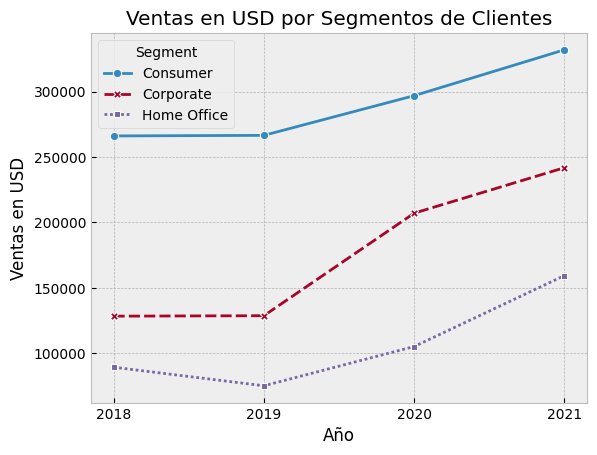

In [ ]:
sns.lineplot(data=ventas_por_segmento, x="Year", y="Sales", hue="Segment", style="Segment", markers=True)
plt.xticks(ventas_por_segmento["Year"].unique())
plt.xlabel("Año")
plt.ylabel("Ventas en USD")
plt.title("Ventas en USD por Segmentos de Clientes")
plt.show()

La visualización del gráfico de lineas es otra buena forma de apreciar como fué la evolución en ventas con respecto a cada segmento de clientes en el tiempo.

###**j) Análisis de las Ventas Mensuales en USD por Segmento de Cliente en el Período 2018-2021**

In [ ]:
# Agrupar por año y meses y segmento de clientes y sumamos las ventas
ventas_meses_por_segmento = df.groupby(['Year','Month','Segment'])['Sales'].sum().reset_index()

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - ventas_meses_por_segmento['Sales'].min()) / (ventas_meses_por_segmento['Sales'].max() - ventas_meses_por_segmento['Sales'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Sales'
ventas_meses_por_segmento_styled = ventas_meses_por_segmento.style.applymap(lambda x: apply_gradient(x), subset=['Sales'])

# Mostramos el DataFrame con colores en la columna 'Sales'
display(ventas_meses_por_segmento_styled)

,Year,Month,Segment,Sales
0,2018,1,Consumer,6927.817000
1,2018,1,Corporate,1701.528000
2,2018,1,Home Office,5607.550000
3,2018,2,Consumer,3167.854000
4,2018,2,Corporate,1183.668000
5,2018,2,Home Office,168.370000
6,2018,3,Consumer,11869.304000
7,2018,3,Corporate,11106.799000
8,2018,3,Home Office,32714.906000
9,2018,4,Consumer,9108.612000


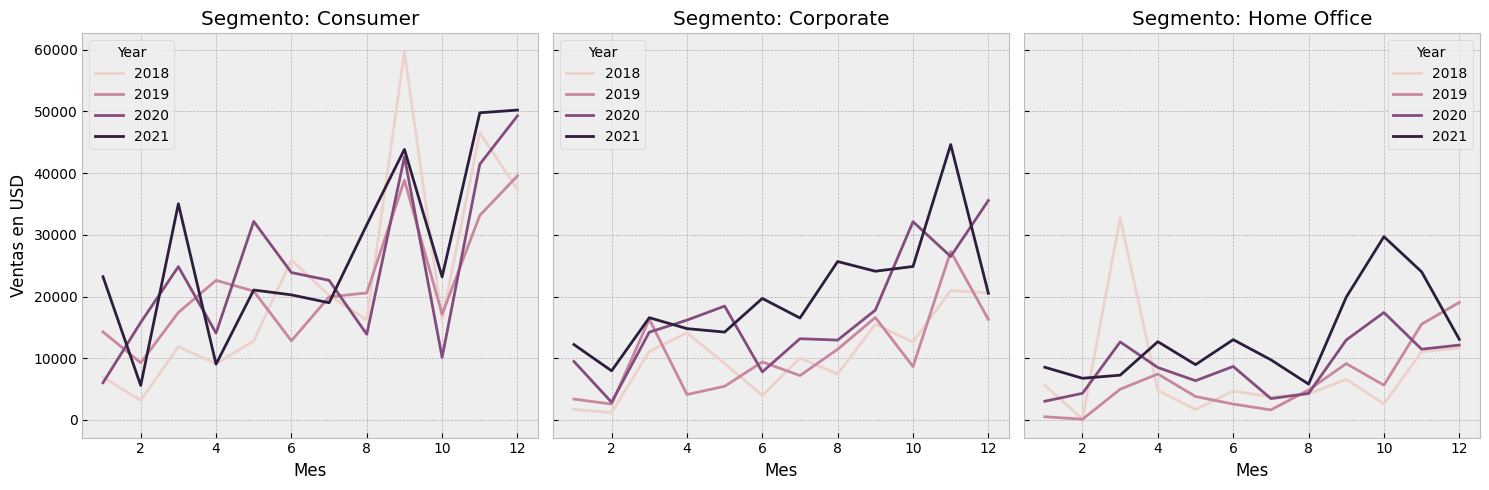

In [ ]:
# Crear subgráficos para la variación por año y por segmento
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Ordenar por año y mes
ventas_meses_por_segmento = ventas_meses_por_segmento.sort_values(by=["Year", "Month"])

# Iterar sobre los segmentos y las subgráficas
for i, segmento in enumerate(ventas_meses_por_segmento["Segment"].unique()):
    data_segmento = ventas_meses_por_segmento[ventas_meses_por_segmento["Segment"] == segmento]

    # Graficar en la fila 0 (primer conjunto de subgráficas)
    sns.lineplot(data=data_segmento, x="Month", y="Sales", hue="Year", ax=axes[i])
    axes[i].set_title(f"Segmento: {segmento}")
# Cambiar las etiquetas de los ejes x e y
    axes[i].set_xlabel("Mes")
    axes[i].set_ylabel("Ventas en USD")
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Mediante el gráfico de lineas referido a la venta total en USD por años y meses dividido por segmentos de clientes podemos identificar rápidamente aquellos meses y años en los que la supertienda vendió más y menos en USD por segmento de clientes, que servirá para por ejemplo poder establecer si ese mes particular se debió a alguna fecha puntual de celebración o bien si los clientes de determinado segmento aceptaron algunas promociones que el departamento de marketing llevó a cabo.

Por ejemplo, podemos ver que el mes Septiembre de 2018 hubo ventas en USD en el segmento Consumer mayor a las habituales durante ese mes en los restantes años.
Lo mismo sucedió en Noviembre de 2021 con el segmento Corporate y en Marzo de 2018 con el segmento Home Office.

A futuro podrá ser buen análisis ver para la tienda cuales fueron los productos que produjeron estas alzas en el total de ventas en USD en cada segmento de clientes.

### **k) Análisis de la Cantidad de Productos Vendidos por Categorías a lo Largo de los 4 Años Operativos de la Tienda Correspondiente a Cada Segmento de Clientes**

In [ ]:
#Primero diferenciemos cual fué la cantidad total de productos vendidos por cada segmento de clientes
productos_por_segmento = df.groupby('Segment')['Quantity'].sum().reset_index()  #agrupo df por la columna 'Segment'

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - productos_por_segmento['Quantity'].min()) / (productos_por_segmento['Quantity'].max() - productos_por_segmento['Quantity'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Quantity'
productos_por_segmento_styled = productos_por_segmento.style.applymap(lambda x: apply_gradient(x), subset=['Quantity'])

# Mostramos el DataFrame con colores en la columna 'Quantity'
display(productos_por_segmento_styled)


,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6742


In [ ]:
#Ahora veamos como fueron los totales de productos vendidos de cada segmento con respecto a cada categoría
cant_vend_total_segmento= df.groupby(['Segment','Category'])['Quantity'].sum().reset_index()

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - cant_vend_total_segmento['Quantity'].min()) / (cant_vend_total_segmento['Quantity'].max() - cant_vend_total_segmento['Quantity'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Quantity'
cant_vend_total_segmento_styled = cant_vend_total_segmento.style.applymap(lambda x: apply_gradient(x), subset=['Quantity'])

# Mostramos el DataFrame con colores en la columna 'Quantity'
display(cant_vend_total_segmento_styled)

,Segment,Category,Quantity
0,Consumer,Furniture,4166
1,Consumer,Office Supplies,11758
2,Consumer,Technology,3597
3,Corporate,Furniture,2495
4,Corporate,Office Supplies,7018
5,Corporate,Technology,2095
6,Home Office,Furniture,1365
7,Home Office,Office Supplies,4130
8,Home Office,Technology,1247


In [ ]:
# Agrupar por Año, Categoria y segmento de clientes y sumamos las Cantidades
cant_vendida_por_segmento_cat = df.groupby(['Year','Segment','Category'])['Quantity'].sum().reset_index()

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - cant_vendida_por_segmento_cat['Quantity'].min()) / (cant_vendida_por_segmento_cat['Quantity'].max() - cant_vendida_por_segmento_cat['Quantity'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Quantity'
cant_vendida_por_segmento_cat_styled = cant_vendida_por_segmento_cat.style.applymap(lambda x: apply_gradient(x), subset=['Quantity'])

# Mostramos el DataFrame con colores en la columna 'Quantity'
display(cant_vendida_por_segmento_cat_styled)

,Year,Segment,Category,Quantity
0,2018,Consumer,Furniture,862
1,2018,Consumer,Office Supplies,2417
2,2018,Consumer,Technology,774
3,2018,Corporate,Furniture,487
4,2018,Corporate,Office Supplies,1459
5,2018,Corporate,Technology,385
6,2018,Home Office,Furniture,272
7,2018,Home Office,Office Supplies,693
8,2018,Home Office,Technology,230
9,2019,Consumer,Furniture,943


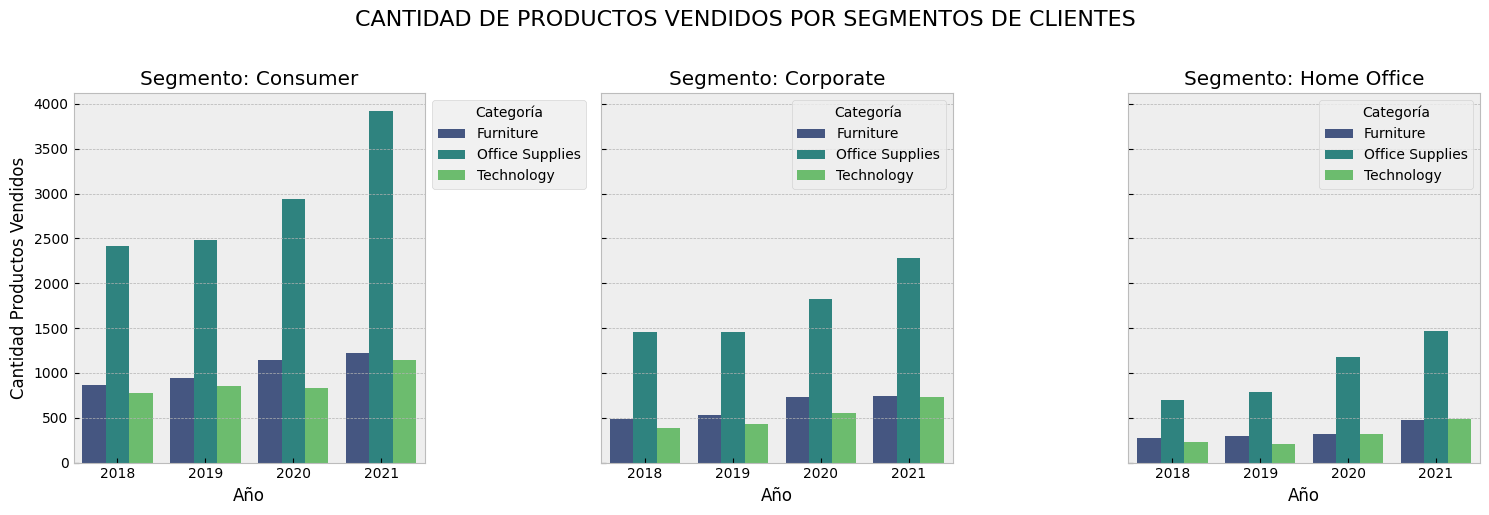

In [ ]:
# Crear subgráficos para cada segmento de clientes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Iterar sobre los segmentos y las subgráficas
for i, segmento in enumerate(cant_vendida_por_segmento_cat["Segment"].unique()):
    data_segmento = cant_vendida_por_segmento_cat[cant_vendida_por_segmento_cat["Segment"] == segmento]

    # Graficar en cada subgráfico
    sns.barplot(data=data_segmento, x="Year", y="Quantity", hue="Category", ax=axes[i], palette="viridis")
    axes[i].set_title(f"Segmento: {segmento}")

    # Personalizar el diseño
    axes[i].set_xlabel("Año")
    axes[i].set_ylabel("Cantidad Productos Vendidos")
    axes[i].legend(title="Categoría", bbox_to_anchor=(1, 1))

    # Agregar título a la figura
fig.suptitle("CANTIDAD DE PRODUCTOS VENDIDOS POR SEGMENTOS DE CLIENTES", y=1.02, fontsize=16)

# Ajustar el diseño global
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Podemos apreciar mediante la observación de los gráficos creados que en los tres segmentos de clientes a lo largo de los años predominó la categoría Office Supplies en cantidad de productos adquiridos.

Sin embargo vale la pena mencionar que a medida que pasan los años parece haber una tendencia en los tres grupos de clientes a igualarse las cantidades vendidas de las categorías Furniture y Technology.

### **l) Análisis de la Frecuencia de Cantidad de Productos Vendidos por Orden de Compra que Predominó en Cada Segmento de Clientes**

In [ ]:
#Calculo frecuencia de cantidades por Segmento de clientes
frecuencia_por_segmento = df.groupby(['Segment', 'Quantity']).size().reset_index(name='Frequencia')

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - frecuencia_por_segmento['Frequencia'].min()) / (frecuencia_por_segmento['Frequencia'].max() - frecuencia_por_segmento['Frequencia'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Frequencia'
frecuencia_por_segmento_styled = frecuencia_por_segmento.style.applymap(lambda x: apply_gradient(x), subset=['Frequencia'])

# Mostramos el DataFrame con colores en la columna 'Frequencia'
display(frecuencia_por_segmento_styled)

,Segment,Quantity,Frequencia
0,Consumer,1,458
1,Consumer,2,1254
2,Consumer,3,1294
3,Consumer,4,616
4,Consumer,5,642
5,Consumer,6,289
6,Consumer,7,299
7,Consumer,8,117
8,Consumer,9,136
9,Consumer,10,25


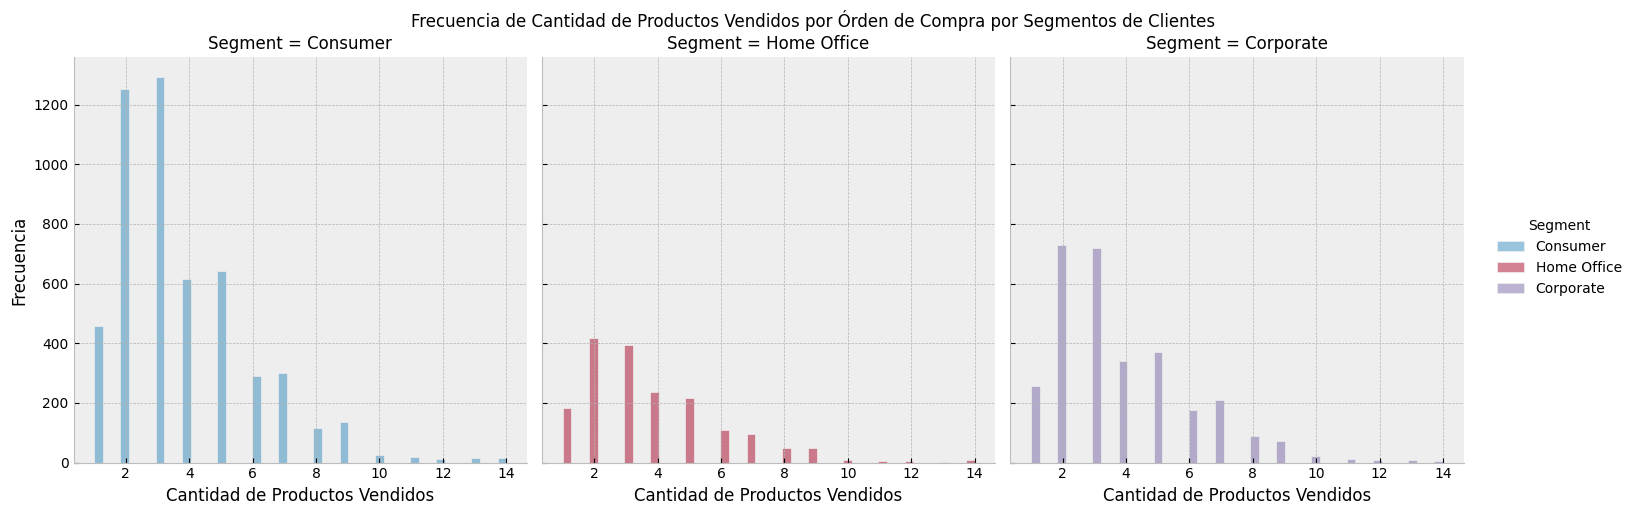

In [ ]:
#Graficamos las frecuencias de las cantidades adquiridas por Segmento
graph = sns.displot(data=df, x="Quantity", hue="Segment", col="Segment")
# Personalizamos los ejes y el título utilizando funciones de Seaborn
graph.set_axis_labels("Cantidad de Productos Vendidos", "Frecuencia")
# Agrega un título único encima de los tres gráficos
graph.fig.suptitle('Frecuencia de Cantidad de Productos Vendidos por Órden de Compra por Segmentos de Clientes', y=1.02)
plt.show()

Podemos apreciar que el segmento "Consumer" en 1294 oportunidades adquirió 3 productos de la tienda. El segmento "Corporate" adquirió mayoritariamente 2 unidades en 729 órdenes. El segmento "Home Office" fué claramente el que menos productos adquirió y predominó la compra de 2 artículos (en 419 órdenes).

### **m) Análisis de la Distribución de Órdenes de Compra Generadas en las Distintas Regiones de Estados Unidos Correspondiente a Cada Segmento de Clientes**

In [ ]:
#Primero vamos a conocer la cantidad de órdenes generadas por región en los 4 años de ventas.
Regiones = df.Region.value_counts()
Regiones

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64

In [ ]:
#Luego me interesa conocer que cantidad de órdenes fueron generadas por segmento de clientes
ordenes_segmento= df.Segment.value_counts()
ordenes_segmento

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64

In [ ]:
# Agrupamos por 'Region' y 'Segmento' y contar la cantidad de órdenes
ordenes_por_region_segmento = df.groupby(['Region', 'Segment']).size().reset_index(name='Cantidad de Ventas') # .size cuenta la cantidad de órdenes para cada combinación de región y segmento.

# Mostrar el resultado
print(ordenes_por_region_segmento)

     Region      Segment  Cantidad de Ventas
0   Central     Consumer                1212
1   Central    Corporate                 673
2   Central  Home Office                 438
3      East     Consumer                1469
4      East    Corporate                 877
5      East  Home Office                 501
6     South     Consumer                 838
7     South    Corporate                 510
8     South  Home Office                 272
9      West     Consumer                1672
10     West    Corporate                 960
11     West  Home Office                 571


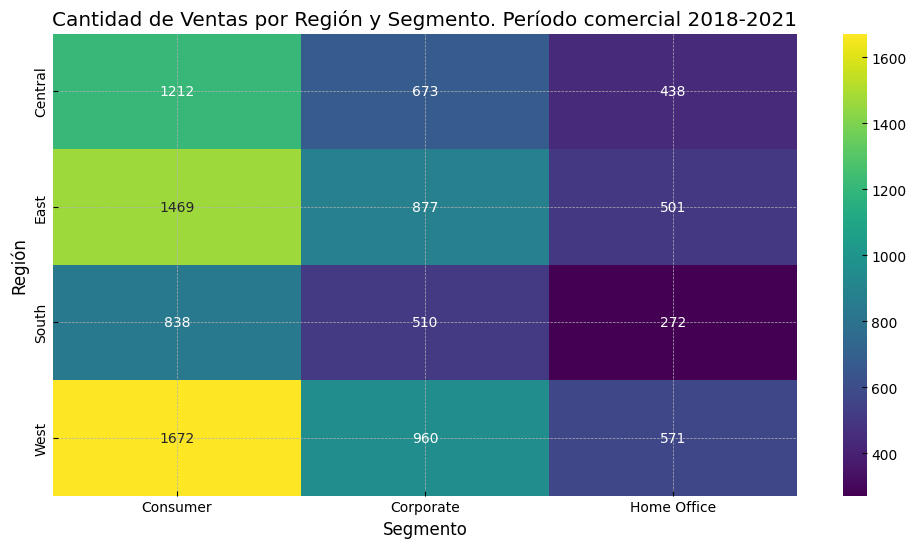

In [ ]:
# Creamos un pivote para utilizar un heatmap
pivot_table = ordenes_por_region_segmento.pivot_table(index='Region', columns='Segment', values='Cantidad de Ventas', fill_value=0) #la región se usa como index=fila, fill_value=0 por si llega haber alguna celda sin valor se llena con 0

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='d') #cmpa es la paleta de colores, fmt=d es formato entero para los valores
plt.title('Cantidad de Ventas por Región y Segmento. Período comercial 2018-2021')
plt.xlabel('Segmento')
plt.ylabel('Región')
plt.show()

Por intermedio del mapa de calor podemos visualizar de una manera más clara la cantidad de órdenes/ventas realizadas por la supertienda por Segmento de clientes y Región en el período comercial que comprende los años 2018 a 2021.

Podemos distinguir que la mayor cantidad de ventas se produjo en la Región West dentro del segmento de clientes Consumer con 1672 ventas.

En contraposición el segmento de clientes Home Office pertenecientes a la Región South fué el que menos ordenó generando 272 ventas para la supertienda.

Estos datos pueden ser realmente útiles para la empresa para detectar en que segmento y región hacer hincapié a futuro en cuanto a campañas de marketing para aumentar el número de ventas.

### **n) Análisis de la Distribución de los Importes de las Ventas por Cada Segmento de Cliente en los Cuatro Años de la Supertienda**

<ipython-input-67-43d116ff01ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y='Sales', palette='Set3')


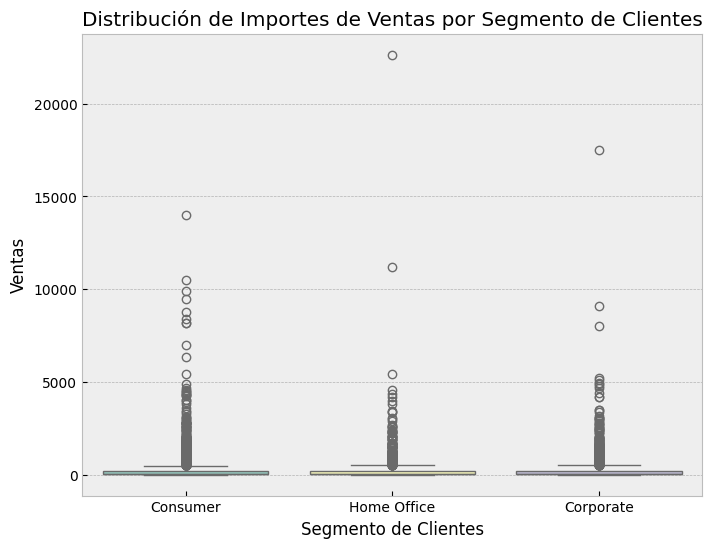

In [ ]:
# Crear un boxplot con Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Segment', y='Sales', palette='Set3')
plt.title('Distribución de Importes de Ventas por Segmento de Clientes')
plt.xlabel('Segmento de Clientes')
plt.ylabel('Ventas')
plt.show()

<ipython-input-68-e5298f7fa7d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y='Sales', palette='Set3', showfliers=False)


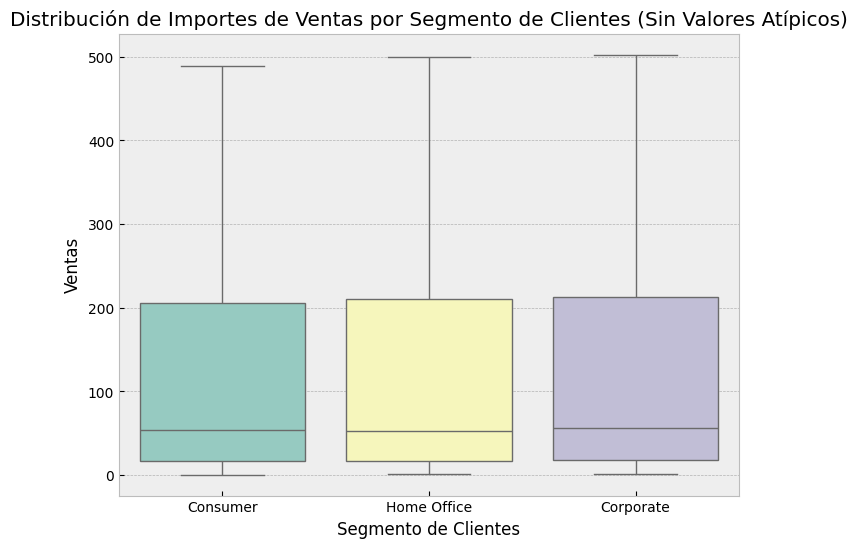

In [ ]:
#Sacamos de la gráfica los valores atípicos para entender mejor la distribución.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Segment', y='Sales', palette='Set3', showfliers=False)
plt.title('Distribución de Importes de Ventas por Segmento de Clientes (Sin Valores Atípicos)')
plt.xlabel('Segmento de Clientes')
plt.ylabel('Ventas')
plt.show()

In [ ]:
# Agrupar por 'Segment' y calcular la mediana, Q1 y Q3
calculo_valores = df.groupby('Segment')['Sales'].describe(percentiles=[.25, .5, .75])

# Seleccionar las columnas relevantes
calculo_valores = calculo_valores[['25%', '50%', '75%']].rename(columns={'25%': 'Q1', '50%': 'Mediana', '75%': 'Q3'})
print(calculo_valores)

                  Q1  Mediana        Q3
Segment                                
Consumer     17.2640    53.72  206.1060
Corporate    17.4690    56.54  212.8950
Home Office  17.0425    52.39  210.4195


Mediante la visualización del boxplot y el cálculo respectivo de las medianas y cuartiles podemos concluir que la distribución de los importes de ventas por segmento de clientes es prácticamente el mismo para cada uno de ellos.

### **ñ) Análisis de la Relación entre el Total de una Venta en USD y el Profit Obtenido por Segmento de Clientes**

In [ ]:
# Divido el DataFrame en grupos según el segmento
segmentos = df.groupby('Segment')

# Inicializamos un diccionario para almacenar las correlaciones por segmento
correlaciones_por_segmento1 = {}

# Calcular la correlación para cada segmento
for segmento, datos_segmento1 in segmentos:
    correlacion = datos_segmento1['Sales'].corr(datos_segmento1['Profit'])
    correlaciones_por_segmento1[segmento] = correlacion
    print(f"Correlación entre Total de una Venta(USD) y Profit(USD) para {segmento}: {correlacion}")

# Imprimir el diccionario con las correlaciones por segmento
print("\nCorrelaciones por segmento:")
print(correlaciones_por_segmento1)

Correlación entre Total de una Venta(USD) y Profit(USD) para Consumer: 0.4962100703986057
Correlación entre Total de una Venta(USD) y Profit(USD) para Corporate: 0.5913808486816219
Correlación entre Total de una Venta(USD) y Profit(USD) para Home Office: 0.29610918872739106

Correlaciones por segmento:
{'Consumer': 0.4962100703986057, 'Corporate': 0.5913808486816219, 'Home Office': 0.29610918872739106}


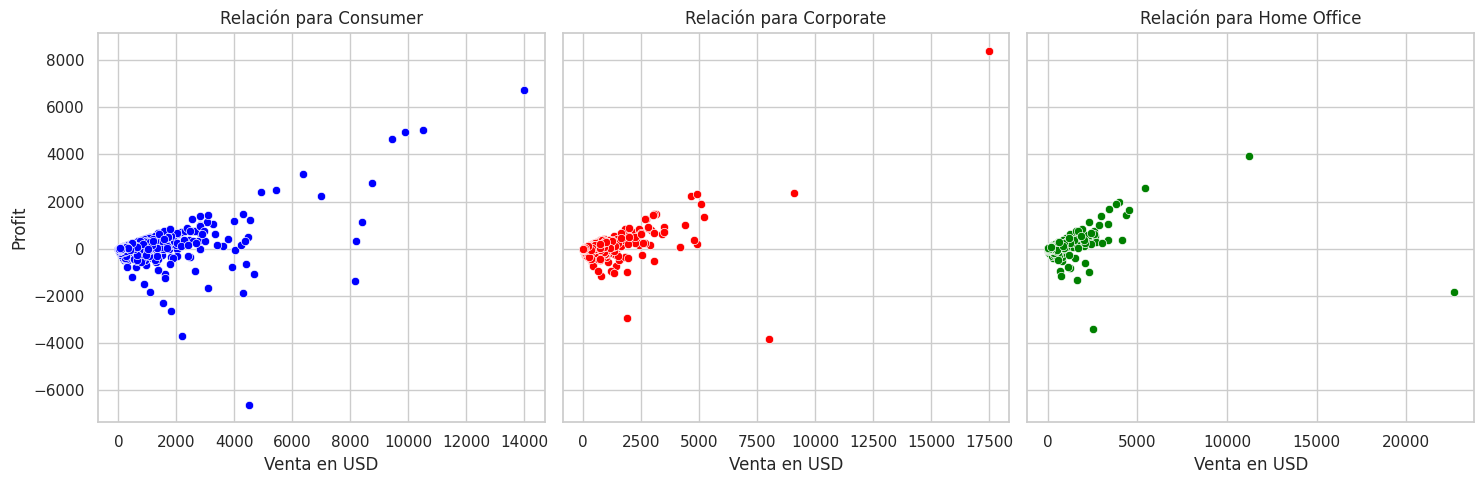

In [ ]:
#Graficamos las relaciones de cada segmento de clientes
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
# Definir colores para cada segmento
colores = {'Consumer': 'blue', 'Home Office': 'green', 'Corporate': 'red'}

# Iterar sobre cada segmento y crear un gráfico de dispersión
for i, (segmento, datos_segmento1) in enumerate(df.groupby('Segment')):
    sns.scatterplot(data=datos_segmento1, x='Sales', y='Profit',color=colores[segmento], ax=axes[i])
    axes[i].set_title(f'Relación para {segmento}')
    axes[i].set_xlabel('Venta en USD')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

La correlación entre el total de una venta (USD) y el profit (USD) muestra cómo estas dos variables están relacionadas en cada segmento de clientes.

Con los resultados y la visualización del gráfico podemos determinar que:
* En el segmento Consumer existe una correlación moderada positiva (0.5 aproximadamente)
* En el segmento Corporate hay una **correlación positiva fuerte** (0.59). Esto sugiere que, en general, un aumento en el total de la venta está fuertemente asociado con un aumento en el beneficio para este segmento.
* En el segmento Home Office existe una correlación débil positiva (0.30 aproximadamente)


# **CREACION DE VARIABLE OBJETIVO PARA EL DESARROLLO DEL MODELO: CLIENTE FIEL**

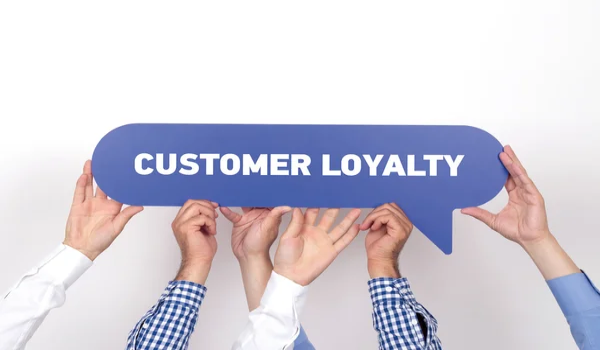

In [ ]:
img4 = cv2.imread('/content/drive/MyDrive/Blotta_Matias_Data_Science/manos.jpg',cv2.IMREAD_UNCHANGED)
nuevo_ancho = 600
nuevo_alto = 350
nuevo_tamano = (nuevo_ancho, nuevo_alto)

# Utilizamos la función resize para cambiar el tamaño de la imagen
img_redimensionada = cv2.resize(img4, nuevo_tamano)

cv2_imshow(img_redimensionada)

**Definimos como cliente fiel aquel que supera el promedio de frecuencia de compra y que ha realizado una compra en los últimos 180 días en ela supertienda.**

In [ ]:
# Calculamos la frecuencia de compra para cada cliente
frecuencia_compra_cliente = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
frecuencia_compra_cliente.rename(columns={'Order ID': 'Frecuencia Compra'}, inplace=True)

def apply_gradient(value):
    # Normalizamos el valor para que esté entre 0 y 1
    normalized_value = (value - frecuencia_compra_cliente['Frecuencia Compra'].min()) / (frecuencia_compra_cliente['Frecuencia Compra'].max() - frecuencia_compra_cliente['Frecuencia Compra'].min())

    # Convertimos el valor normalizado a una escala de colores (en formato hexadecimal)
    color = "#{:02x}{:02x}{:02x}".format(*[int(255 * c) for c in plt.cm.Oranges(normalized_value)[:3]])

    # Devolvemos el estilo en formato HTML
    return 'background-color: {}'.format(color)

# Aplicamos la función a la columna 'Frecuencia Compra'
frecuencia_compra_cliente_styled = frecuencia_compra_cliente.style.applymap(lambda x: apply_gradient(x), subset=['Frecuencia Compra'])

# Mostramos el DataFrame con colores en la columna 'Frecuencia Compra'
display(frecuencia_compra_cliente_styled)

,Customer ID,Frecuencia Compra
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
5,AB-10060,8
6,AB-10105,10
7,AB-10150,5
8,AB-10165,8
9,AB-10255,9


In [ ]:
# Calculamos el promedio de la frecuencia de compra
promedio_frecuencia_compra = frecuencia_compra_cliente['Frecuencia Compra'].mean()
promedio_frecuencia_compra

6.316519546027743

In [ ]:
# Determinamos si el cliente ha comprado en los últimos 180 días y creamos una nueva columna llamada Cliente Reciente
ultima_compra = df['Order Date'].max()
df['Dias_desde_ultima_compra'] = (ultima_compra - df['Order Date']).dt.days
df['Cliente Reciente'] = (df['Dias_desde_ultima_compra'] <= 180).astype(int)

In [ ]:
# Fusionamos el DataFrame original con la frecuencia de compras para que aparezca la columna en el df original
df = pd.merge(df, frecuencia_compra_cliente, on='Customer ID', how='left')

In [ ]:
# Crear la columna 'Cliente Fiel' con las condiciones que establecimos para dicha variable: haber comprado en los ultimos 180 dias y que supere el promedio de frecuencia de compras.
df['Cliente Fiel'] = ((df['Cliente Reciente'] == 1) & (df['Frecuencia Compra'] > promedio_frecuencia_compra)).astype(int)

In [ ]:
# Transformamos variables categóricas que nos interesan para nuestro modelo a numéricas
df = pd.get_dummies(df, columns=['Region', 'Category', 'Segment'])


In [ ]:
# veamos con que columnas contamos ahora en el df
columnas_df = df.columns.tolist()
print(columnas_df)

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'City', 'State', 'Postal Code', 'Product ID', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year', 'Month', 'Day', 'Dias_desde_ultima_compra', 'Cliente Reciente', 'Frecuencia Compra', 'Cliente Fiel', 'Region_Central', 'Region_East', 'Region_South', 'Region_West', 'Category_Furniture', 'Category_Office Supplies', 'Category_Technology', 'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office']


In [ ]:
# Seleccionamos las variables que consideramos más relevantes para el modelo

variables_importantes = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Region_Central', 'Region_East', 'Region_South', 'Region_West',
               'Category_Office Supplies', 'Category_Technology', 'Category_Furniture',
               'Segment_Consumer', 'Segment_Corporate', 'Segment_Home Office','Dias_desde_ultima_compra', 'Cliente Reciente', 'Frecuencia Compra','Cliente Fiel']]

In [ ]:
#Veamos ahora la seleccion de variables que hicimos para la generación del modelo
variables_importantes

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#La variable objetivo a determinar será Cliente Fiel, por lo que veamos con que cantidad de clientes fieles contamos.
cantidad_cliente_fiel = df['Cliente Fiel'].value_counts()
print(cantidad_cliente_fiel)

0    8687
1    1306
Name: Cliente Fiel, dtype: int64


In [ ]:
x = variables_importantes.drop("Cliente Fiel", 1)       # feature matrix
y = variables_importantes['Cliente Fiel']               # target feature

<ipython-input-82-834db7aa3bb5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = variables_importantes.drop("Cliente Fiel", 1)       # feature matrix


In [ ]:
x

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9989    0
9990    0
9991    0
9992    0
9993    0
Name: Cliente Fiel, Length: 9994, dtype: int64

# **Feature Selection **

Aplicación de **Forward selection:** Selección hacia adelante

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(x,y)

<ipython-input-84-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-84-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-84-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-84-a6ce63c591b0>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-84-a6

['Cliente Reciente', 'Frecuencia Compra', 'Region_West', 'Segment_Home Office']

Mediante la aplicación de Forward Selection nos recomienda utilizar las variables: ['Cliente Reciente', 'Frecuencia Compra', 'Region_West', 'Segment_Home Office']

**Uso de la función SequentialFeatureSelector()**

In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=17,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

#en este caso selecciono k_features = 17 para que contemple todas las variables que considero importante

In [ ]:
sfs.fit(x, y)
sfs.k_feature_names_     #Lista final de features

('Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Region_Central',
 'Region_East',
 'Region_South',
 'Region_West',
 'Category_Office Supplies',
 'Category_Technology',
 'Category_Furniture',
 'Segment_Consumer',
 'Segment_Corporate',
 'Segment_Home Office',
 'Dias_desde_ultima_compra',
 'Cliente Reciente',
 'Frecuencia Compra')

# **Creación del modelo y aplicación del algoritmo de clasificación : Regresión Logística**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definimos las variables dependientes (X) y la variable objetivo (y)
X = x
y = variables_importantes['Cliente Fiel']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos el modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Imprimimos el informe de clasificación
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1744
           1       0.84      0.91      0.87       255

    accuracy                           0.97      1999
   macro avg       0.91      0.94      0.93      1999
weighted avg       0.97      0.97      0.97      1999



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.metrics import confusion_matrix

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[1699,   45],
       [  22,  233]])

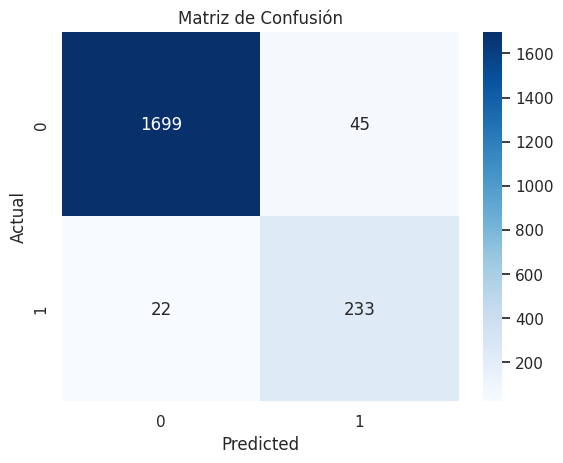

In [ ]:
# Visualizamos la matriz de confusión
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()



 El modelo de clasificación (Regresión Logística) tiene un buen rendimiento general.

 La exactitud (Accuracy) es del 97%, lo que significa que el modelo clasifica correctamente el 97% de las instancias en el conjunto de prueba.

 La precisión para la clase 0 (Clientes no fieles) es alta (99%). Esto indica que de todas las instancias que el modelo predice como no fieles, el 99% realmente son no fieles.

 La precisión para la clase 1 (Clientes fieles) es del 84%. Esto significa que del total de instancias que el modelo predice como clientes fieles, el 84% realmente son fieles a la supertienda.

 El recall para la clase 0 es del 97%, lo que indica que el modelo identifica correctamente al 97% de las instancias reales de clientes no fieles.

 El recall para la clase 1 es del 91%, lo que significa que el modelo identifica correctamente al 91% de las instancias reales de clientes fieles.

 Para la clase 0, el F1-score es del 98%, y para la clase 1 es del 87%. Estos valores son bastante buenos y sugieren un equilibrio adecuado.

# **Probamos otros algoritmos:**

## **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Definimos las variables dependientes (X) y la variable objetivo (y)
X = x
y = variables_importantes['Cliente Fiel']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo
tree_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Evaluamos el rendimiento del modelo de árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree:.2f}')

# Imprimimos el informe de clasificación para el árbol de decisión
print(classification_report(y_test, y_pred_tree))

Accuracy (Decision Tree): 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       255

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



Los resultados indican que el modelo de árbol de decisión tiene un rendimiento perfecto en el conjunto de prueba, con una precisión del 100% para ambas clases.

## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Definimos las variables dependientes (X) y la variable objetivo (y)
X = x
y = variables_importantes['Cliente Fiel']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo
rf_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluamos el rendimiento del modelo de Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')

# Imprimimos el informe de clasificación para Random Forest
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       255

    accuracy                           1.00      1999
   macro avg       1.00      1.00      1.00      1999
weighted avg       1.00      1.00      1.00      1999



Al igual que el algoritmo anterior, utilizando RandomForest los resultados indican que el modelo tiene un rendimiento perfecto en el conjunto de prueba, con una precisión del 100% para ambas clases.